<img src="https://i.imgur.com/TM1tRpS.png" alt="Logo UFRJ" style="margin:0 auto 0">

<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">UNIVERSIDADE FEDERAL DO RIO DE JANEIRO</p>
<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">INSTITUTO DE COMPUTAÇÃO</p>
<p style="text-align: center;font-size:1.1em; font-weight: normal; font-family: sans-serif;">DEPARTAMENTO DE CIÊNCIA DA COMPUTAÇÃO</p>


<br>
<br>
<br>
<br>
<br>


<p style="text-align: center;font-size:1.1em; font-family: sans-serif;">Carlos Bravo<br>Gabrielly de Andrade<br>Markson Arguello</p>

<br>
<br>
<br>
<br>
<br>





<p style="text-align: center;font-weight: bold; font-size:1.5em; font-family: sans-serif;">Biblioteca de Cálculo Numérico</p>


<br>
<br>
<br>
<br>
<br>

<p style="text-align: center;font-weight: bold; font-size:1.0em; font-family: sans-serif;">Rio de Janeiro<br>2022</p>

# Introdução
Essa é uma biblioteca feita para o trabalho final da disciplina de Cálculo Numérico no período de 21.2. A biblioteca inclui funções aprendidas e utilizadas durante todo o semestre, como soluções de sistemas lineares, integração, decomposição LU entre outros. Neste notebook falaremos sobre todas essas funções, além disso, será apresentado a documentação e exemplos das funções. 

In [63]:
include("NumericalCalculus.jl");

In [5]:
using Plots
theme(:lime)

## 1. Aproximação de valor

Esse tópico refere-se ao problema 

> 2. Problema: Achar um valor aproximado de uma função com informações de derivadas

### 1.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 1.2 Primeiro exemplo

Vamos aproximar $sen(0.01)$

Repare que temos valores conhecidos para $sen$ pela tabela trigonométrica

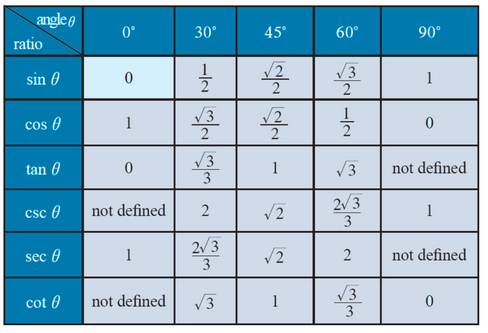

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar **0.01**. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **value_approximation**, vamos explorá-la

In [64]:
?value_approximation

search: value_approximation



## Objetivo

Achar um valor aproximado de uma função com informações de derivadas utilizando o método de Taylor

## Especificação

$|y - f(x)|<= E$

## Parâmetros de entrada

```
x : Number
    Valor aproximado que queremos calcular a aproximação em y (f(x))

a : Number
    Ponto fixo que será calculado a aproximação
    Idealmente é próximo de x e é conhecida as derivadas no ponto

derivatives : Vector
    Vetor com informações das derivadas no ponto a: f(a), f'(a), f''(a) ...

M: Number
    Maior valor da n-derivada no intervalo (teto)

n: Int64, optional
    Número de termos do polinômio de Taylor
    Se nenhum valor for passado será calculado o polinômio de ordem 2
```

## Retorno

```
y : Flotat64
    Retorna o valor aproximado de f(x)

E : Float64
    Retorna o erro da aproximação
```

## Exceções

```
AssertionError
    Caso a quantidade de derivadas no vetor seja insuficiente para realizar o 
    cálculo, levanta exeção de domínio
```


Vendo o contrato da função, precisamos 4 parâmetros obrigatórios. Repare que a função sen(x) oscila entre 1 e -1, portanto sua derivada tem um teto de no máximo 1

In [25]:
# Exemplo 1.1 com ordem = 3

f1_1(x) = sin(x)
df1_1(x) = cos(x)
d2f1_1(x) = -sin(x)
d3f1_1(x) = -cos(x)

# Parâmetros obrigatórios
x_1_1 = 0.01
a_1_1=0
derivates_1_1 = [f1_1(a_1_1), df1_1(a_1_1), d2f1_1(a_1_1), d3f1_1(a_1_1)]
M_1_1 = 1

# Parâmetro opcional

ordem_1_1 = 3


value_approximation(x_1_1, a_1_1, derivates_1_1, M_1_1, ordem_1_1)

(0.009999833333333333, 4.166666666666667e-10)

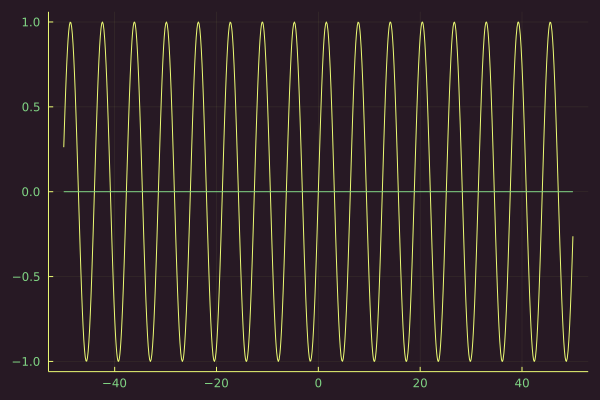

In [26]:
f1_1(x) = sin(x)
plot(f1_1, -50, 50, legend=false) 
plot!(zero)

### 1.2 Segundo exemplo

Vamos aproximar $cos(0.90)$.

Repare que é um pouco parecido com o exemplo anterior, mas dessa vez vamos utilizar a ordem = 2 como padrão

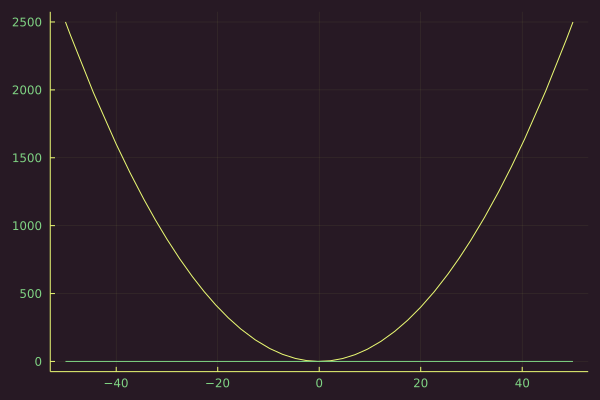

In [111]:
f_1_2(x) = cos(x)
plot(f, -50, 50, legend=false) 
plot!(zero)

In [112]:
# Exemplo 1.2 com ordem padrão = 2

f1_2(x) = cos(x)
df1_2(x) = -sin(x)
d2f1_2(x) = -cos(x)

# Parâmetros obrigatórios
x_1_2 = 0.90
a_1_2=0
derivates_1_2 = [f1_2(a_1_2), df1_2(a_1_2), d2f1_2(a_1_2)]
M_1_2 = 1


value_approximation(x_1_2, a_1_2, derivates_1_2, M_1_2)

(0.595, 0.12150000000000001)

### 1.3 Terceiro exemplo

Vamos aproximar $ln(1.5)$.

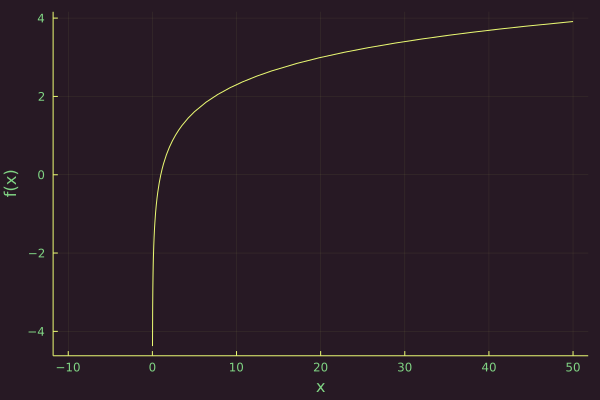

In [113]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

In [114]:
# Exemplo 1.3 com ordem = 3

f1_3(x) = ln(x)
df1_3(x) = 1/x
d2f1_3(x) = -1/(x^2)
d3f1_3(x) = 2/(x^3)

# Parâmetros obrigatórios
x_1_3 = 1.5
a_1_3=1
derivates_1_3 = [f1_3(a_1_3), df1_3(a_1_3), d2f1_3(a_1_3), d3f1_3(a_1_3)]
M_1_3 = 1


value_approximation(x_1_3, a_1_3, derivates_1_3, M_1_3, 3)

(0.4166666666666667, 0.0026041666666666665)

## 2. Aproximação de raiz de função

Esse tópico refere-se ao problema 

> 3. Problema: Encontrar raíz aproximadamente

### 2.1 Introdução

Dado uma função, queremos descobrir o seu valor aproximado em um determinado ponto. Isso pode ser um problema muito complicado para se calcular na mãoe podemos utilizar o série de Taylor tal que a cada vez eu adiciono um novo termo na sequência eu me aproximo cada vez mais do valor real.

Vamos testar com alguns exemplos da biblioteca.

### 2.2 Primeiro exemplo

Vamos aproximar $\sqrt[3]{43}$ 

Se quiséssemos calcular na mão, seria muito trabalhoso aproximar esse valor. Felizmente, podemos utilizar nossa biblioteca para calcular essa aproximação.

O nome da função é **find_root**, vamos explorá-la

In [31]:
?find_root

search: find_root



## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método da Bisseção. Retorna um aviso caso o intervalo passado pelo usuário não possua sinais trocados.

## Especificação

f(r)=0 e |x-r| <= erro

## Parâmetros

```
f : Function
    Recebe uma função 

a : Number
    Início do intervalo

b : Number
    Fim do intervalo

error: Number
    Erro no domínio
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método da Bisseção
```

## Exceções

```
AssertionError
    Caso o intervalo passado não tenha troca de valores no intervalo (sinais opostos) para o método da Bisseção
```

---

## Objetivo

Encontrar zero de função (raiz) para calcular aproximação de valores numéricos com o método de Newton

## Especificação

f(r)=0

## Parâmetros

```
f : Function
    Recebe uma função 

derivative: Function
    Derivada da função f

qtty_iterations: Int64, optional
    Quantidade de interações para ser utilizada no método 
    Caso nenhum valor seja passado será calculado 10 iterações

kick: Float64
    Chute da função inicial para começar a aplicar o método

method: String, optional
    Método que será aplicado a aproximação da raiz da função (:bisecion ou :newton)
    Caso nenhum método seja escolhido o padrão é o da Bisseção
```

## Retorno

```
root : Float64
    Retorna uma aproximação para a raiz calculada pelo método de Newton
```


Para aproximar $\sqrt[3]{43}$ temos que pensar em um número tal que $x^3 = 43$, ou seja, podemos pensar em uma função $f(x) = x^3 - 43$.

Vamos utilizar no primeiro exemplo o método de Newton para calcular essa aproximação

In [116]:
# Exemplo 2.1 

# Passo 1: definir a função que queremos aproximar
f_2_1(x) = x^3 - 43

# Passo 2: escolher um chute (valor arbitrário, de preferência que se aproxime do zero da função)

chute_2_1 = 4

# Passo 3: derivar f

derivada_f_2_1(x) = 3x^2

find_root(f_2_1, derivada_f_2_1, chute_2_1)

3.5033980603867243

### 2.3 Segundo exemplo

Agora, vamos aproximar o mesmo valor $\sqrt[3]{43}$, mas dessa vez utilizando o método da bisseção.

Podemos perceber pela documentação da função que podemos passar novos parâmetros para utilizar esse método.
Dessa vez temos que passar além da função um intervalo e um erro.
 

In [117]:
# Exemplo 2.2

find_root(f_2_1, big"-100", big"100", 10^-2)

3.5003662109375

Repare que caso não tivesse sinais trocados no intervalo teríamos recebido um aviso como no exemplo abaixo

In [118]:
# Exemplo 2.2

find_root(f_2_1, big"10", big"100", 10^-2)

LoadError: AssertionError: Aviso!! A função no intervalo passado [10, 100] não possui sinais opostos

### 2.4 Terceiro exemplo

Vamos aproximar $ln(3)$, utilizando o método da bisseção com um erro de $10^{-3}$ no intervalo de 0 a 10

 

Como sabemos calcular $e^x$ podemos utilizar a seguinte relação:

$e^{ln(3)} = e^{x}$ e teremos a relação $x = ln(3)$ que é o que queremos encontrar.


Repare que pela propriedade $ln(e^c) = c$, teremos $ln(e^x) = x$, onde $e^x = 3$

Escrevendo em forma de função e considerando as demais informações no enunciado, temos:

- Função: $f(x) = e^x - 3$
- Erro: $10^{-3}$

Utilizando a função, teremos


In [119]:
# Exemplo 2.3

f_2_3(x) = exp(x) - 3

find_root(f_2_3, 0, 10, 10^(-3))

1.09832763671875

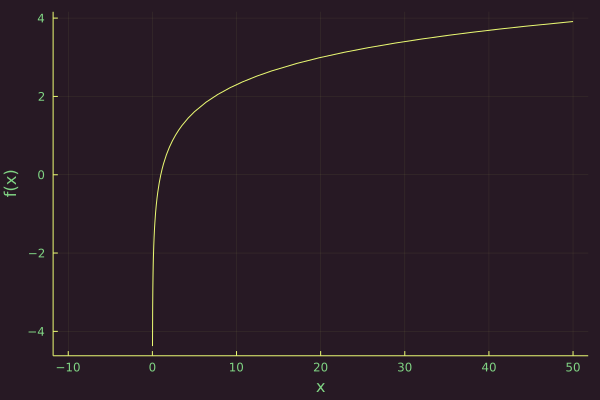

In [120]:
ln(x) = log(ℯ, x)

plot(ln, -10, 50, legend=false)
xlabel!("x")
ylabel!("f(x)")

## 3. Interpolação polinomial

Esse tópico refere-se ao problema 

> 4. Problema: Interpolação Polinomial

### 3.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa por todos os pontos dados de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 3.2 Primeiro exemplo

Vamos transformar o seguinte conjunto de pontos $p = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]$ em uma função contínua

O nome da função é **interpolation**, vamos explorá-la

In [32]:
?interpolation

search: interpolation interpolation_2d lagrange_interpolation



## Objetivo

Transforma um conjunto de pontos discretos em uma função contínua.

## Especificação

Para todo 1<=i<=n, F(x*i)=y*i

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: [(x1, y1), (x2,y2)]

method: Symbol, optional
    Nome do método utilizado para a interpolação.
    Valores possíveis: :vandermonde ou :lagrange
    Método padrão: vandermonde
```

## Retorno

```
function : function
    Retorna um polinômio com grau no máximo n-1 (tamanho do vetor de pontos - 1)
```

## Exceções

```
AssertionError
    Caso o método escolhido seja diferente de :vandermonde ou :lagrange
```


In [37]:
points_3_2 = [(exp(0), 0), (exp(1), 1), (exp(2), 2)]

function_3_2 = interpolation(points_3_2)


(::var"#f#216"{Int64, Vector{Float64}}) (generic function with 1 method)

In [38]:
function_3_2(3)

1.1315109615486736

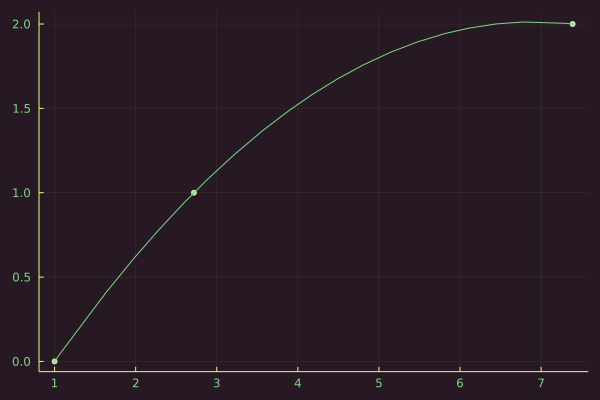

In [39]:
scatter([exp(0); exp(1); exp(2)], [0; 1; 2], c=:lightblue, ms=3, leg=false)
plot!(function_3_2)

### 3.3 Segundo exemplo

Vamos agora testar com um conjunto de pontos que é uma parábola, mas como estamos dando 4 pontos iremos observar que o grau é no máximo 3. Para isso, basta definir o segundo parâmetro da função como grau

In [40]:
points_3_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-50, 2256)]

function_3_3 = interpolation(points_3_3)


(::var"#f#216"{Int64, Vector{Float64}}) (generic function with 1 method)

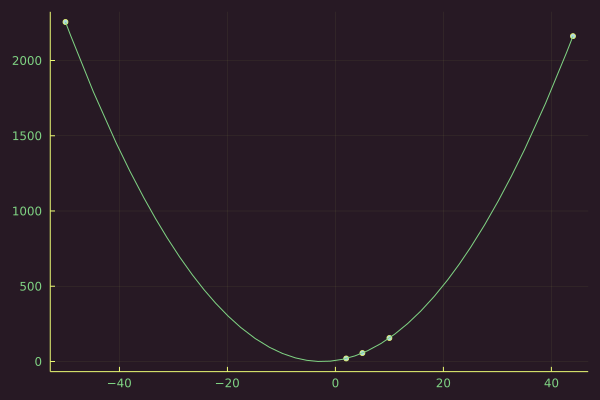

In [41]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_3_3)

### 3.4 Terceiro exemplo

Vamos agora testar com um conjunto de pontos que é o $sen$

In [42]:
points_3_4 = [(pi/2, 1), (0,0), (-pi/2, -1), (-pi, 0)]

function_3_4 = interpolation(points_3_4)


(::var"#f#216"{Int64, Vector{Float64}}) (generic function with 1 method)

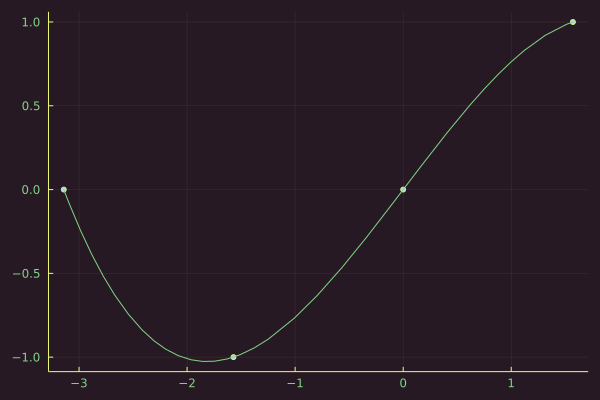

In [43]:
scatter([pi/2, 0, -pi/2, -pi], [1, 0, -1, 0], c=:lightblue, ms=3, leg=false)
plot!(function_3_4)

## 4. Regressão

Esse tópico refere-se aos problemas

> 5. Problema: Regressão Polinomial (“Interpolação aproximada”)
> 6. Problema: Regressão com coeficiente lineares (generalização do problema
anterior)

### 4.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa próximo de todos os pontos com o menor erro, de modo que no fim tenhamos algo contínuo.

Vamos testar com alguns exemplos da biblioteca.

### 4.2 Primeiro exemplo

Vamos transformar um conjunto de pontos totalmente aleatório, de modo que fique difícil saber exatamente qual o grau do polinômio.

O nome da função é **linear_regression**, vamos explorá-la

In [44]:
?linear_regression

search: linear_regression



## Objetivo

Realizar a regressão com coeficientes lineares

## Especificação

Para todo 1<=i<=n, F(x*i) aproximadamente y*i

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: [(x1, y1), (x2,y2)]

degree : Int64
    Grau da interpolação

functions: Vector{function}, optional
    Caso esse vetor for passado, será calculado a regressão generalizada
```

## Retorno

```
function : function
    Retorna uma função no seu formato linear tradicional ou generalizada (com multiplifcação de funções)
```


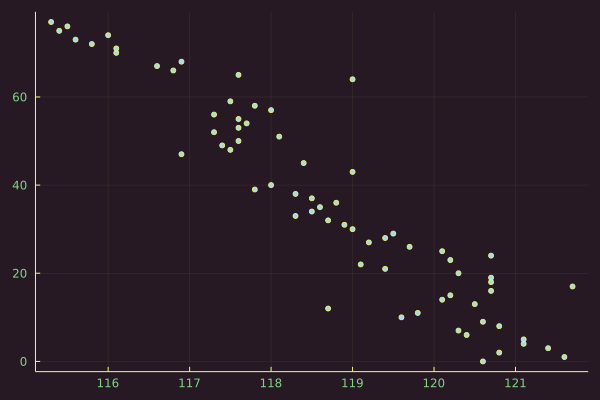

In [45]:
x = [120.6,121.6,120.8,121.4,121.1,121.1,120.4,120.3,120.8,120.6,119.6,119.8,118.7,120.5,120.1,120.2,120.7,121.7,120.7,120.7,120.3,119.4,119.1,120.2,120.7,120.1,119.7,119.2,119.4,119.5,119,118.9,118.7,118.3,118.5,118.6,118.8,118.5,118.3,117.8,118,119,118.4,116.9,117.5,117.4,117.6,118.1,117.3,117.6,117.7,117.6,117.3,118,117.8,117.5,119,117.6,116.8,116.6,116.9,116.1,116.1,115.8,115.6,116,115.4,115.5,115.3]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,45,47,48,49,50,51,52,53,54,55,56,57,58,59,64,65,66,67,68,70,71,72,73,74,75,76,77]

scatter(x, y, c=:lightblue, ms=3, leg=false)

Diferentemente da interpolação, é difícil passar por todos os pontos. Para isso vamos usar a regressão. Pelo contrato da função precisamos de um conjunto de pontos no formato $[(x_0,y_0), ... ,(x_n,y_n)]$

In [46]:
points_4_2 = [(x[i], y[i]) for i in 1:length(x)]

function_4_2 = linear_regression(points_4_2, 4)


(::var"#lr#231"{Int64}) (generic function with 1 method)

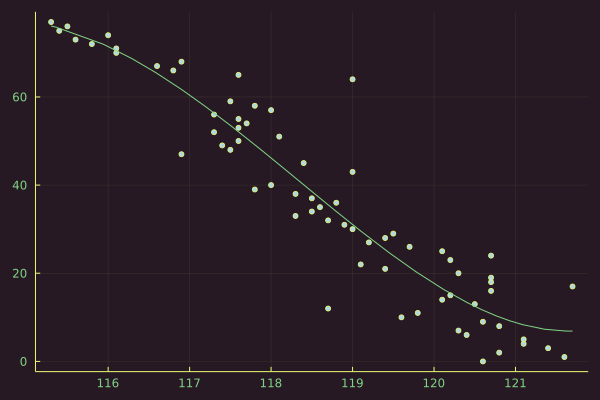

In [47]:
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(function_4_2)

### 4.3 Segundo exemplo

Vamos pegar o mesmo exemplo anterior, mas dessa vez vamos pegar os 5 primeiros pontos e tentar traçar uma reta (grau 1) passando funções de transformação

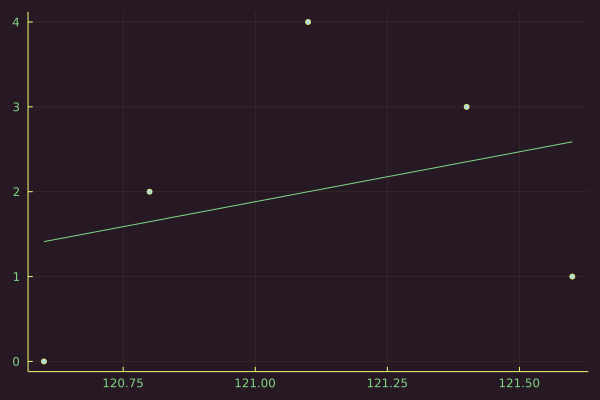

In [48]:
points_4_3 = [(x[i], y[i]) for i in 1:5]

function_4_3 = linear_regression(points_4_3, 1)

scatter(points_4_3, c=:lightblue, ms=3, leg=false)
plot!(function_4_3)


In [51]:
fv1(x) = exp(x)
fv2(x) = 2x + 1
fv3(x) = x^2 + 2x + 1

functions_4_3 = [fv1, fv2, fv3, fv1, fv2]

5-element Vector{Function}:
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)
 fv3 (generic function with 1 method)
 fv1 (generic function with 1 method)
 fv2 (generic function with 1 method)

### 4.4 Terceiro exemplo

Vamos pegar o mesmo exemplo no tópico **3.3**, mas dessa vez vamos delimitar que o retorno seja uma função de grau 2, ou seja, uma parábola. Vamos adicionar somente um pequeno ruído nessa parábola

In [52]:
points_4_3 = [(2, 20), (5, 56), (10, 156), (44, 2162), (-45, 2256)]

function_4_3 = linear_regression(points_4_3, 2)

(::var"#lr#231"{Int64}) (generic function with 1 method)

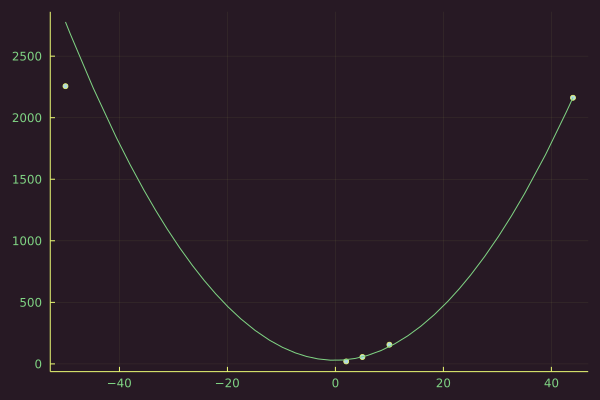

In [53]:
scatter([2; 5; 10; 44; -50], [20; 56; 156; 2162; 2256], c=:lightblue, ms=3, leg=false)
plot!(function_4_3)

## 5. Regressão com coeficientes não-lineares

Esse tópico refere-se ao problema 

> 7. Problema: Regressão com coeficientes não lineares.

### 5.1 Introdução

Dado um conjunto de pontos discretos, queremos saber qual é a função que passa próximo de todos os pontos com o menor erro, de modo que no fim tenhamos algo contínuo. O problema aqui comparado com o problema anterior é que estaremos trabalhando com coeficientes não lineares.

Para cada modelo, existe uma função correspondente seguindo o mesmo contrato, modificando apenas o modelo de abordagem, podendo ser:

**1. Exponencial**
- Modelo: $y = c_1e^{c_2x}$
- Linearização: $ln(y) = ln(c_1) + c_2x$
- Função **exponential_regression()**

**2. Potência**
- Modelo: $y = c_1x^{c_2}$
- Linearização: $ln(y) = ln(c_1) + c_2ln(x)$
- Função **potency_regression()**

**3. Geométrico**
- Modelo: $y = \frac{1}{c_1 + c_2x}$
- Linearização: $\frac{1}{y} = c_1 + c_2x$
- Função **geometric_regression()**

Todas podem ser acessadas suas respectivas documentações. Exemplo da exponencial:


In [54]:
?exponential_regression

search: exponential_regression



## Objetivo

Realizar a regressão com coeficientes não lineares do modelo exponencial

## Especificação

Para todo 1<=i<=n, F(x*i) aproximadamente y*i Calculada com a linearização da forma ln(y) = ln(c1) + c2*x

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com coordenadas (x,y). Formato: [(x1, y1), (x2,y2)]
```

## Retorno

```
function : function
    Retorna uma função com o modelo da forma y = c1*e^(c2*x)
```


Veremos exemplos de cada modelo abaixo

### 5.2 Primeiro exemplo

Vamos analisar o exemplo de um conjunto de pontos que se encaixam com o modelo exponencial visualmente analisando

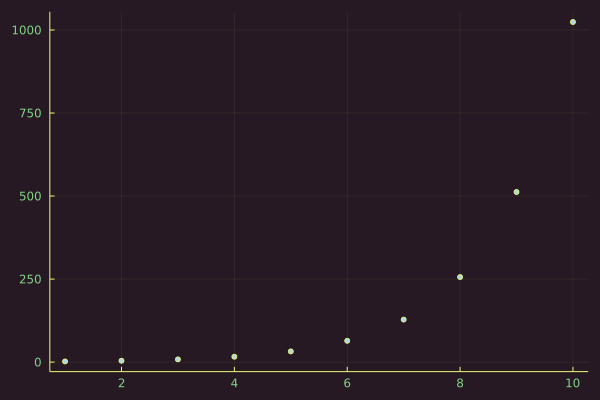

In [14]:
x=[1;2;3;4;5;6;7;8;9;10]
y=[2;4;8;16;32;64;128;256;512;1024]
ruido=rand(10)*0.44
y=y+ruido

scatter(x, y, c=:lightblue, ms=3, leg=false)

Para isso, vamos fazer a regressão não linear com esses pontos e comparar com a função modelo gerada

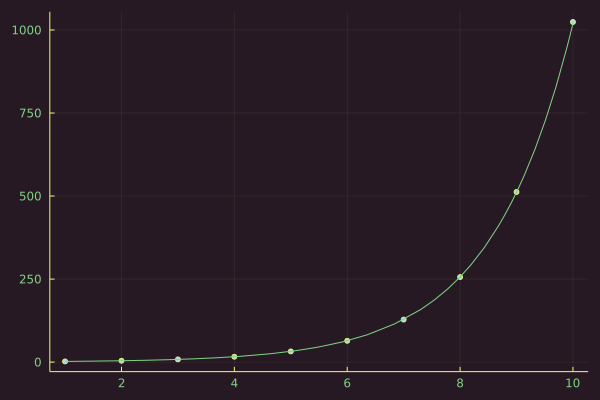

In [15]:
points = [(x[i],y[i]) for i in 1:length(x)]

exponencial = exponential_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(exponencial)

### 5.3 Segundo exemplo

Vamos olhar agora para um modelo não-linear que se encaixaria no modelo de potência

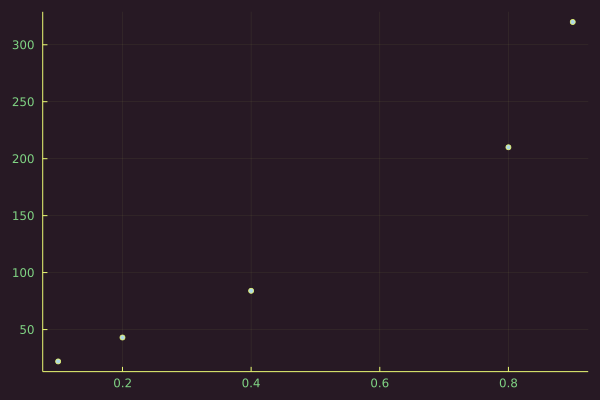

In [16]:
x = [0.1,0.2,0.4,0.8,0.9] 
y = [22,43,84,210,320] 

scatter(x, y, c=:lightblue, ms=3, leg=false)

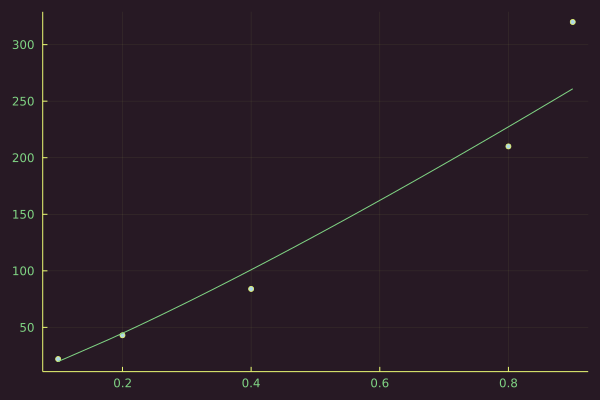

In [18]:
points = [(x[i],y[i]) for i in 1:length(x)]

potencia = potency_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(potencia)

### 5.4 Terceiro exemplo

O que aconteceria se testássemos agora com alguns pontos de um modelo geométrico? 

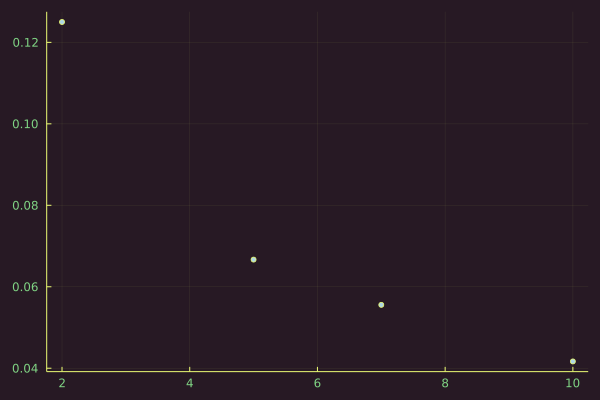

In [19]:
x = [2, 5, 7, 10] 
y = [1/8, 1/15, 1/18, 1/24] 

scatter(x, y, c=:lightblue, ms=3, leg=false)

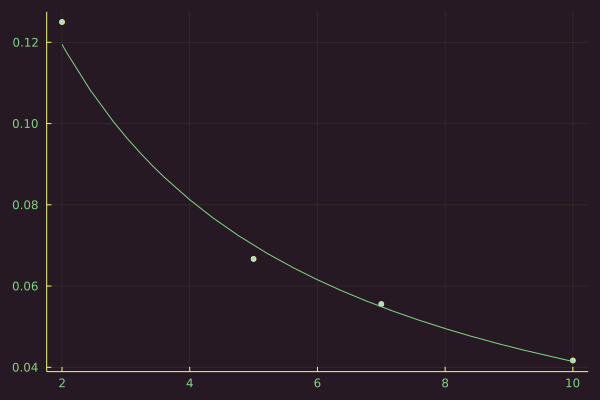

In [24]:
points = [(x[i],y[i]) for i in 1:length(x)]

geometrico = geometric_regression(points)

scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(geometrico)

## 6. Interpolação 2D

Esse tópico refere-se ao problema 

> 8. Problema: Interpolação 2D

### 6.1 Introdução

A ideia por trás desse problema é que dado um vetor de coordenadas (x,y) e um vetor de altura (z), queremos conseguir achar uma função de grau 2 e de duas variáveis .

Vamos testar com alguns exemplos da biblioteca com a nossa função **interpolation_2d**

In [55]:
?interpolation_2d

search: interpolation_2d interpolation lagrange_interpolation



## Objetivo

Realiza a interpolacao 2D (bilinear) dado 4 pontos geométricos e suas respectivas alturas

## Especificação

Para todo 1<=i<=n, F(x*i,y*j)=zij

## Parâmetros

```
points : Vector{Tuple{Number, Number}}
    Vetor com 2 coordenadas (x,y). Formato: [(x1, y1), (x2,y2)]

z : Vector{Float64}
    Vetor com alturas
```

## Retorno

```
function : function
    Retorna uma função de grau dois de duas variáveis
```


### 6.2 Primeiro exemplo

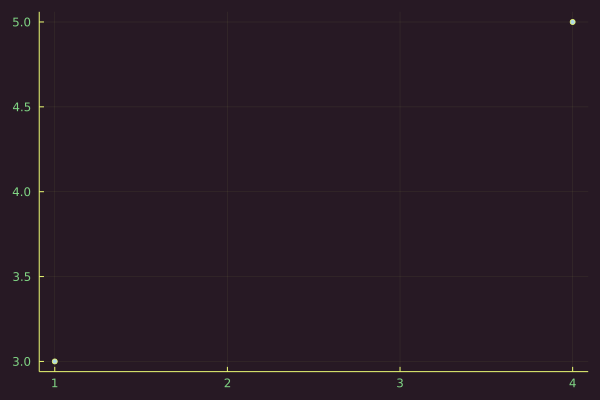

In [56]:
points = [(1,3), (4,5)]
z = [1, 4, 6, 9]

scatter(points, c=:lightblue, ms=3, leg=false)

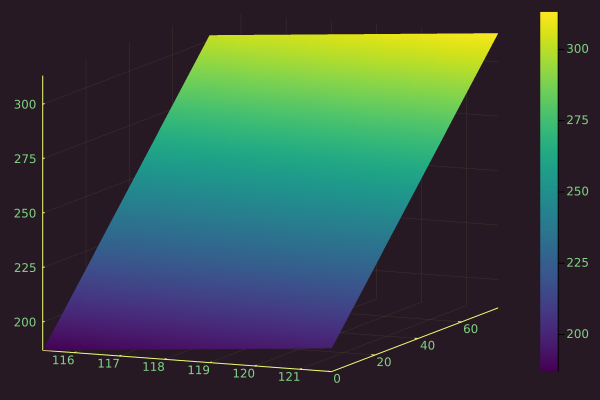

In [57]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

### 6.3 Segundo exemplo



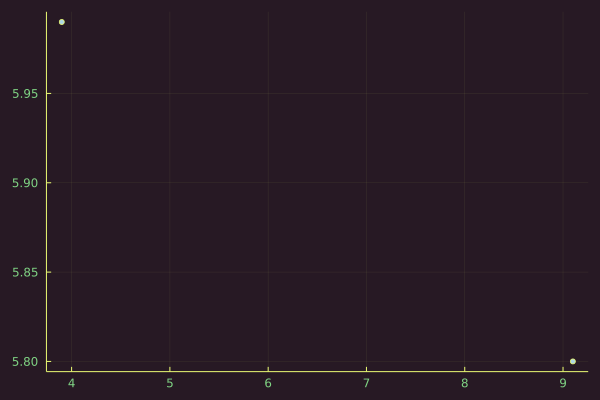

In [58]:
points = [(9.1,5.8), (3.9,5.99)]
z = [10, 1, 10, 2]

scatter(points, c=:lightblue, ms=3, leg=false)

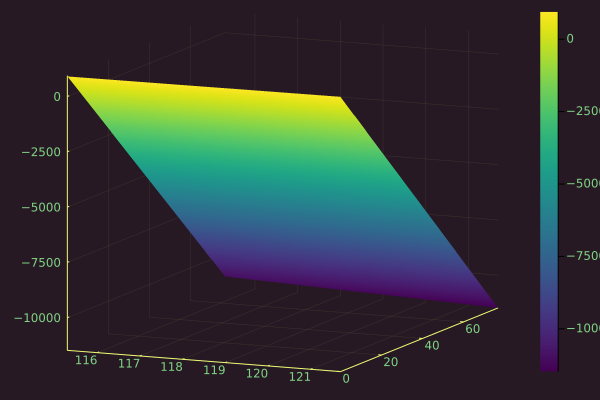

In [59]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

### 6.4 Terceiro exemplo



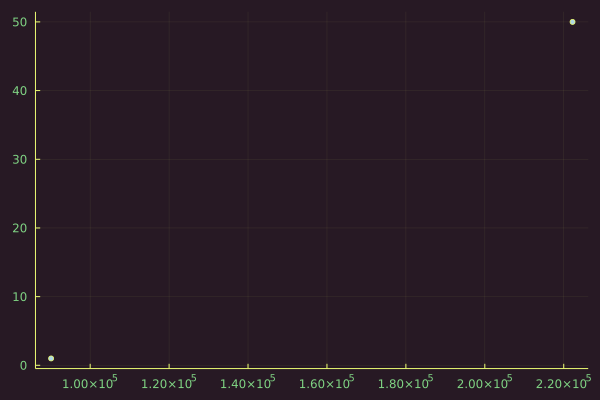

In [60]:
points = [(90099,1), (222235,50)]
z = [1, 100, 19, 0]

scatter(points, c=:lightblue, ms=3, leg=false)

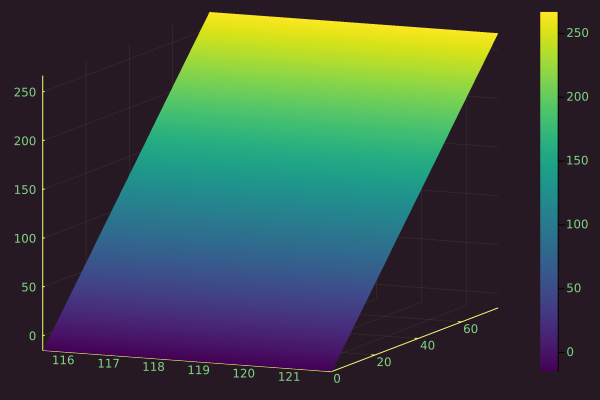

In [61]:
interpolation_2d_1 = interpolation_2d(points, z)

surface(x, y, interpolation_2d_1)

##  7. Norma do vetor

Esse tópico refere-se ao problema 

> 9. Calcular a norma de um vetor v

### Introdução

Para calcularmos a norma de um vetor precisamos fazer a soma de todos os seus elementos ao quadrados e por fim tirar a raiz quadrada do resultado

In [62]:
?vector_norm

search: vector_norm



## Objetivo

Calcular a norma de um vetor.

## Especificação

$z=\sqrt{v_1^2 + v_2^2 + ... + v_n^2}$

## Parâmetros

```
v : Vector{Float64}
    Recebe um vetor
```

## Retorno

```
z : Float64
    Retorna a norma do vetor v
```


### Primeiro exemplo

Vamos calcular a norma do vetor $[3,2]$

In [187]:
v = Float64.([
    3;
    2;
]);

z = vector_norm(v)

3.605551275463989

### Segundo exemplo

In [188]:
v = Float64.([
    6;
    7;
    10;
    1;
    2;
]);

z = vector_norm(v)

13.784048752090222

### Terceiro exemplo

In [189]:
v = Float64.([
    10;
    10;
    10;
    10;
    10;
    10;
]);

z = vector_norm(v)

24.49489742783178

 ##  8. Mínimos quadrados

Esse tópico refere-se ao problema 

> 10. Problema: Resolver um sistema linear denso aproximadamente

### Introdução

Para aproximarmos uma resposta para o sistema linear $Ax=b$ onde $A$ é uma matriz $mxn$ e b um vetor $nx1$ podemos simplesmente resolver o sistema $A'Ax=A'b$, onde $A'$ é a transposta da matriz $A$.

In [190]:
?least_squares

search: least_squares



## Objetivo

Aproximar a solução do sistema Ax=b utilizando o método de mínimos quadrados.

Dado uma matriz densa mxn (m>n) A e um vetor b resolve o sistema A’Ax=A’b onde Ax* aproximadamente b ( x*=argmin ||Ax-b|| )

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma matriz densa

b : Vector{Float64}
    Um vetor b tal que Ax=b
```

## Retorno

```
x : Vector{Float64}
    Retorna uma aproximação da solução do sistema A’Ax=A’b
```


### Primeiro exemplo

In [191]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
])
b = Float64.([
    125;
    658;
    965;
    225;
])

4-element Vector{Float64}:
 125.0
 658.0
 965.0
 225.0

In [192]:
x_approx = least_squares(A, b)

5-element Vector{Float64}:
   1.6167929337786064
   1.2588858072759326
  12.154623071130871
  23.62129197352659
 -18.45045045045045

In [193]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

true

### Segundo exemplo

In [194]:
A = Float64.([
    51 65 72 14;
    15 32 41 65;
    12 65 54 76;
])
b = Float64.([
    125;
    658;
    75;
])


3-element Vector{Float64}:
 125.0
 658.0
  75.0

In [195]:
x_approx = least_squares(A, b)

4-element Vector{Float64}:
  34.09813403443973
 -15.793658742703396
 -11.52193305059539
  17.2972972972973

In [196]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

true

### Terceiro exemplo

In [197]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
])
b = Float64.([
    8464;
    7854;
    3645;
    9568;
])

4-element Vector{Float64}:
 8464.0
 7854.0
 3645.0
 9568.0

In [198]:
x_approx = least_squares(A, b)

6-element Vector{Float64}:
 -222.03508571059757
   52.7941689027321
   58.20077232814037
   23.093903830241068
  295.2072072072072
   -0.0

In [199]:
norm(A*x_approx - b) < 1^-9  # Testo se A*x é aproximadamente b

true

 ##  9. Resolver exatamente um sistema linear 

Esse tópico refere-se ao problema 

> 11. Problema: Resolver exatamente um sistema linear denso

### Introdução

Para resolvermos o sistema linear Ax=b, utilizamos o método da decomposição LU. Primeiro fazemos a decomposição $A=LU$ e obtemos:
$$LUx=b$$

Depois fazemos a seguinte substituição $Y = Ux$ e resolvemos os seguintes sistemas:
$$LY=b$$
$$Ux=Y$$

In [200]:
?solve_system

search: solve_system



## Objetivo

Resolver um sistema Ax = b onde A eh uma matriz nxn e b uma matriz nx1 utilizando decomposição LU.

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma matriz nxn

b : Vector{Float64}
    Um vetor tal que Ax=b
```

## Retorno

```
x : Vector{Float64}
    Retorna a solução do sistema Ax=b
```


### Primeiro exemplo

In [201]:
A = Float64.([
    2 -1 3;
    1 2 4;
    1 1 5;
])
b = Float64.([
    2;
    1;
    4;
])

3-element Vector{Float64}:
 2.0
 1.0
 4.0

In [202]:
x = solve_system(A, b)

3-element Vector{Float64}:
 -2.0
 -1.5
  1.5

In [203]:
norm(A*x - b) < 1^-9  # Testo se A*x é aproximadamente b

true

### Segundo exemplo

In [204]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
    58 75 96 35 68;
])
b = Float64.([
    125;
    658;
    965;
    225;
    698;
])

5-element Vector{Float64}:
 125.0
 658.0
 965.0
 225.0
 698.0

In [205]:
x = solve_system(A, b)

5-element Vector{Float64}:
   6.351979658279592
   0.11727495519312539
  10.323704940799859
  21.82022722000662
 -21.088148071128217

In [206]:
norm(A*x - b) < 1^-9 # Testo se A*x é aproximadamente b

true

### Terceiro exemplo

In [207]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
    58 75 96 35 68 11;
    45 79 23 10 35 20;
])
b = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

6-element Vector{Float64}:
 8464.0
 7854.0
 3645.0
 9568.0
 8972.0
 9851.0

In [208]:
x = solve_system(A, b)

6-element Vector{Float64}:
 -287.97969264404253
  117.36450883553086
  -87.97163925171857
  -46.785699818236175
  372.08284723942825
  150.32975092834357

In [209]:
norm(A*x - b) < 1^-9 # Testo se A*x é aproximadamente b

true

 ## 10. Resolver um sistema triangular superior

Esse tópico refere-se ao problema 

> 12. Problema: Resolver um sistema triangular superior

### Introdução

Para resolver um sistema $Ax=y$ sendo $A$ uma matriz triangular superior basta começarmos a resolver de baixo para cima e ir substituindo os valores nas equações de cima. 

In [210]:
?upper_triangular_solve

search: upper_triangular_solve



## Objetivo

Resolver um sistema Ax = y onde A eh uma matriz triangular superior e y uma matriz nx1

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma matriz triangular superior no formato (n,n)

y : Vector{Float64}
    Um vetor tal que Ax=y
```

## Retorno

```
x : Vector{Float64}
    Retorna a solução do sistema Ax=y
```


### Primeiro exemplo

In [211]:
A = Float64.([
    2 -1 3;
    0 2 4;
    0 0 5;
])
y = Float64.([
    2;
    1;
    4;
])

3-element Vector{Float64}:
 2.0
 1.0
 4.0

In [212]:
x = upper_triangular_solve(A, y)

3-element Vector{Float64}:
 -0.7500000000000002
 -1.1
  0.8

In [213]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Segundo exemplo

In [214]:
A = Float64.([
    44 -94 17 54 71;
    0 95 -45 98 74;
    0 0 93 15 42;
    0 0 0 16 75;
    0 0 0 0 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

5-element Vector{Float64}:
 125.0
 658.0
 965.0
 225.0
 698.0

In [215]:
x = upper_triangular_solve(A, y)

5-element Vector{Float64}:
 107.8606411428401
  39.38028750124838
  11.233139626818469
 -34.05330882352941
  10.264705882352942

In [216]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Terceiro exemplo

In [217]:
A = Float64.([
    44 -94 17 54 71 65;
    0 95 -45 98 74 -40;
    0 0 93 15 42 75;
    0 0 0 16 75 63;
    0 0 0 0 68 11;
    0 0 0 0 0 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

6-element Vector{Float64}:
 8464.0
 7854.0
 3645.0
 9568.0
 8972.0
 9851.0

In [218]:
x = upper_triangular_solve(A, y)

6-element Vector{Float64}:
  5277.540488398108
  1826.2836492403626
  -125.75582750237194
 -1586.4029871323528
    52.26397058823529
   492.55

In [219]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

 ## 11. Resolver um sistema triangular inferior

Esse tópico refere-se ao problema 

> 13. Problema: Resolver um sistema triangular inferior

### Introdução

Para resolver um sistema $Ax=y$ sendo $A$ uma matriz triangular inferior basta começarmos a resolver de cima para baixo e ir substituindo os valores nas equações de baixo. 

In [220]:
?lower_triangular_solve

search: lower_triangular_solve



## Objetivo

Resolver um sistema Ax = y onde A eh uma matriz triangular inferior e y uma matriz nx1

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma Matrix triangular inferior no formato (n,n)

y : Vector{Float64}
    Um vetor tal que Ax=y
```

## Retorno

```
x : Vector{Float64}
    Retorna a solução do sistema Ax=y
```


### Primeiro exemplo

In [221]:
A = Float64.([
    2 0 0;
    1 2 0;
    1 1 5;
])
y = Float64.([
    2;
    1;
    4;
])

3-element Vector{Float64}:
 2.0
 1.0
 4.0

In [222]:
x = lower_triangular_solve(A, y)

3-element Vector{Float64}:
 1.0
 0.0
 0.6

In [223]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Segundo exemplo

In [224]:
A = Float64.([
    44 0 0 0 0;
    84 95 0 0 0;
    87 91 93 0 0;
    95 64 82 16 0;
    58 75 96 35 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

5-element Vector{Float64}:
 125.0
 658.0
 965.0
 225.0
 698.0

In [225]:
x = lower_triangular_solve(A, y)

5-element Vector{Float64}:
   2.840909090909091
   4.414354066985646
   3.3992977311313477
 -37.884214867263466
  17.673024351014135

In [226]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Terceiro exemplo

In [227]:
A = Float64.([
    44 0 0 0 0 0;
    84 95 0 0 0 0;
    87 91 93 0 0 0;
    95 64 82 16 0 0;
    58 75 96 35 68 0;
    45 79 23 10 35 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

6-element Vector{Float64}:
 8464.0
 7854.0
 3645.0
 9568.0
 8972.0
 9851.0

In [228]:
x = lower_triangular_solve(A, y)

6-element Vector{Float64}:
 192.36363636363637
 -87.41626794258374
 -55.22318258990583
  88.52479163451136
  96.6792207062637
 255.08170448019854

In [229]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

 ##  12. Resolver um sistema diagonal

Esse tópico refere-se ao problema 

> 14.Problema: Resolver um sistema diagonal

### Introdução

Para resolver um sistema $Ax=y$ onde $A$ é uma matriz diagonal basta dividirmos o lado direito pelo coeficiente de cada variável

In [230]:
?solve_diagonal

search: solve_diagonal



## Objetivo

Resolver um sistema Ax = y onde A eh uma matriz diagonal e y uma matriz nx1

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma Matrix diagonal no formato (n,n)

y : Vector{Float64}
    Um vetor tal que Ax=y
```

## Retorno

```
x : Vector{Float64}
    Retorna a solução do sistema Ax=y
```


### Primeiro exemplo

In [231]:
A = Float64.([
    2 0 0;
    0 2 0;
    0 0 5;
])
y = Float64.([
    2;
    1;
    4;
])

3-element Vector{Float64}:
 2.0
 1.0
 4.0

In [232]:
x = solve_diagonal(A, y)

3-element Vector{Float64}:
 1.0
 0.5
 0.8

In [233]:
 norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Segundo exemplo

In [234]:
A = Float64.([
    44 0 0 0 0;
    0 95 0 0 0;
    0 0 93 0 0;
    0 0 0 16 0;
    0 0 0 0 68;
])
y = Float64.([
    125;
    658;
    965;
    225;
    698;
])

5-element Vector{Float64}:
 125.0
 658.0
 965.0
 225.0
 698.0

In [235]:
x = solve_diagonal(A, y)

5-element Vector{Float64}:
  2.840909090909091
  6.926315789473684
 10.376344086021506
 14.0625
 10.264705882352942

In [236]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

### Terceiro exemplo

In [237]:
A = Float64.([
    44 0 0 0 0 0;
    0 95 0 0 0 0;
    0 0 93 0 0 0;
    0 0 0 16 0 0;
    0 0 0 0 68 0;
    0 0 0 0 0 20;
])
y = Float64.([
    8464;
    7854;
    3645;
    9568;
    8972;
    9851;
])

6-element Vector{Float64}:
 8464.0
 7854.0
 3645.0
 9568.0
 8972.0
 9851.0

In [238]:
x = solve_diagonal(A, y)

6-element Vector{Float64}:
 192.36363636363637
  82.67368421052632
  39.193548387096776
 598.0
 131.94117647058823
 492.55

In [239]:
norm(A*x - y) < 1^-9 # Testo se A*x é aproximadamente y

true

 ## 13. Achar a inversa de uma matriz

Esse tópico refere-se ao problema 

> 15. Problema: achar a inversa de uma matriz

### Introdução

Para acharmos a inversa de uma matriz $A$ no formato $nxn$ utilizamos a decomposição LU. Após fazermos a decomposição $A=LU$, nós podemos resolver os $n$ sistemas:
$$LUx_i=b_i$$
Onde $b_i$ é a i-ésima coluna da matriz identidade e $x_i$ é a i-ésima coluna da inversa de A.

In [240]:
?inverse_LU

search: inverse_LU



## Objetivo

Achar a inversa de uma matriz A utilizando o método da decomposição LU.

## Parâmetros

```
A : Matrix{Float64}
    Recebe uma Matriz no formato (n,n)
```

## Retorno

```
inv_A : Matrix{Float64}
    Retorna a inversa da matriz A
```


### Primeiro exemplo

In [241]:
A = Float64.([
    2 -1 3;
    1 2 4;
    1 1 5;
])

3×3 Matrix{Float64}:
 2.0  -1.0  3.0
 1.0   2.0  4.0
 1.0   1.0  5.0

In [242]:
A_inv = inverse_LU(A)

3×3 Matrix{Float64}:
  0.6   0.8  -1.0
 -0.1   0.7  -0.5
 -0.1  -0.3   0.5

In [243]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [244]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

true

### Segundo exemplo

In [245]:
A = Float64.([
    44 -94 17 54 71;
    84 95 -45 98 74;
    87 91 93 15 42;
    95 64 82 16 75;
    58 75 96 35 68;
])

5×5 Matrix{Float64}:
 44.0  -94.0   17.0  54.0  71.0
 84.0   95.0  -45.0  98.0  74.0
 87.0   91.0   93.0  15.0  42.0
 95.0   64.0   82.0  16.0  75.0
 58.0   75.0   96.0  35.0  68.0

In [246]:
A_inv = inverse_LU(A)

5×5 Matrix{Float64}:
  0.00498873   0.00135661   0.0195562    0.00172293  -0.0206642
 -0.00713442   0.0024849   -0.00483321   0.00249177   0.00498196
  0.0036331   -0.00446551   0.0103019   -0.0120468    0.00799008
  0.00891879   0.00452255   0.0199648   -0.0312119    0.0078598
 -0.00610588   7.86717e-5  -0.0361694    0.0288543    0.0115108

In [247]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [248]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

true

### Terceiro exemplo

In [249]:
A = Float64.([
    44 -94 17 54 71 65;
    84 95 -45 98 74 -40;
    87 91 93 15 42 75;
    95 64 82 16 75 63;
    58 75 96 35 68 11;
    45 79 23 10 35 20;
])

6×6 Matrix{Float64}:
 44.0  -94.0   17.0  54.0  71.0   65.0
 84.0   95.0  -45.0  98.0  74.0  -40.0
 87.0   91.0   93.0  15.0  42.0   75.0
 95.0   64.0   82.0  16.0  75.0   63.0
 58.0   75.0   96.0  35.0  68.0   11.0
 45.0   79.0   23.0  10.0  35.0   20.0

In [250]:
A_inv = inverse_LU(A)

6×6 Matrix{Float64}:
 -0.0139701    0.0114637    0.00303912  …  -0.0142329   -0.0498806
  0.00123018  -0.00197436   0.00245411      0.00214448   0.0220073
 -0.00241746  -0.0012399    0.00503058      0.0100426   -0.015919
  0.0087279    0.00462432   0.0197985       0.00792456  -0.000502227
  0.00758389  -0.00721949  -0.0242428       0.00686693   0.0360178
  0.0117178   -0.00624685   0.0102086   …  -0.00397496   0.0308294

In [251]:
n, = size(A)
identidade = Matrix(1.0I, n, n)

6×6 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0

In [252]:
norm(A * A_inv - identidade) < 1e-9 # Testo se A vezes a inversa de A é aproxidamente a identidade

true

## 14. Decomposição LU

Esse tópico refere-se ao problema 

> 16. Problema: Decomposição LU

Dada uma matriz quadrada $A$ de tamanho $(n,n)$, é possível realizar sua decomposição LU. A decomposição consiste em uma matriz $L$ triangular inferior e uma matriz $U$ triangular superior tal que $A=LU$.

### Exemplo 14.1
Matriz diagonal

In [16]:
A_14_1 = [
    1 0 0;
    0 2 0;
    0 0 4;
]

L_14_1, U_14_1 = lu_decomposition(A)
display(A_14_1_14_1)
display(U_14_1)
display(L_14_1*U_14_1)
@assert(norm(L_14_1*U_14_1 - A_14_1) < 1e-15)

LoadError: UndefVarError: A not defined

In [23]:
A_14_1 = [
    1 0 0;
    0 2 0;
    0 0 4;
]

L_14_1, U_14_1 = lu_decomposition(A_14_1)
display(L_14_1)
display(U_14_1)
display(L_14_1*U_14_1)
@assert(norm(L_14_1*U_14_1 - A_14_1) < 1e-15)A_14_1 = Float64.([
    1 0 0;
    0 2 0;
    0 0 4;
])

L_14_1, U_14_1 = lu_decomposition(A_14_1)
display(L_14_1)
display(U_14_1)
display(L_14_1*U_14_1)
@assert(norm(L_14_1*U_14_1 - A_14_1) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

LoadError: syntax: "if (norm(((L_14_1 * U_14_1) - A_14_1)) < 1e-15)
else
    Base.throw
    Base.AssertionError("norm(L_14_1 * U_14_1 - A_14_1) < 1.0e-15")
end" is not a valid function argument name around In[23]:11

### Exemplo 14.2
Matriz tiangular inferior

In [141]:
A = [
    1 0 0;
    5 2 0;
    8 1 4;
]

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  1.0  0.0
 8.0  0.5  1.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 5.0  2.0  0.0
 8.0  1.0  4.0

### Exemplo ?.3
Matriz triangular superior

In [142]:
A = Float64.([
    1 7 2;
    0 2 9;
    0 0 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

3×3 Matrix{Float64}:
 1.0  7.0  2.0
 0.0  2.0  9.0
 0.0  0.0  4.0

### Exemplo ?.4
Matriz densa

In [143]:
# Exemplo 4: Matriz densa

A = Float64.([
    1 2 3;
    5 2 9;
    8 1 4;
])

L, U = lu_decomposition(A)
display(L)
display(U)
display(L*U)
@assert(norm(L*U - A) < 1e-15)

3×3 Matrix{Float64}:
 1.0  0.0    0.0
 5.0  1.0    0.0
 8.0  1.875  1.0

3×3 Matrix{Float64}:
 1.0   2.0   3.0
 0.0  -8.0  -6.0
 0.0   0.0  -8.75

3×3 Matrix{Float64}:
 1.0  2.0  3.0
 5.0  2.0  9.0
 8.0  1.0  4.0

## ?. Derivada Contínua

In [10]:
f(x) = x^2
continuous_derivative(f, 2, 1e-2, :backsfsdf)

LoadError: AssertionError: Invalid option, possible options are: :front, :back, and :center

## ?. Derivada Discreta

In [11]:
function discrete_derivative(f, x, degree, option = :center)
    n = length(f)
    fy = copy(f)
    for k = 1:degree
        y = zeros(n)
        
        # Nas pontas so tem uma opcao
        y[1] = (fy[2] - fy[1])/(x[2] - x[1])
        y[n] = (fy[n] - fy[n-1])/(x[n] - x[n-1])
        
        # No meio e escolha do usuario
        for i = 2:n-1
            deriv = 0
            if(option == :front) deriv = (fy[i+1] - fy[i])/(x[i+1] - x[i]) end
            if(option == :back) deriv = (fy[i] - fy[i-1])/(x[i] - x[i-1]) end
            if(option == :center) deriv = (fy[i+1] - fy[i-1])/(x[i+1] - x[i-1]) end
            y[i] = deriv
        end
        
        fy = copy(y)
    end
    
    return fy
end

discrete_derivative (generic function with 2 methods)

In [7]:
discrete_derivative([1,4,9,16,25],[1,2,3,4,5],3)

5-element Vector{Float64}:
  0.5
  0.5
  0.0
 -0.5
 -0.5

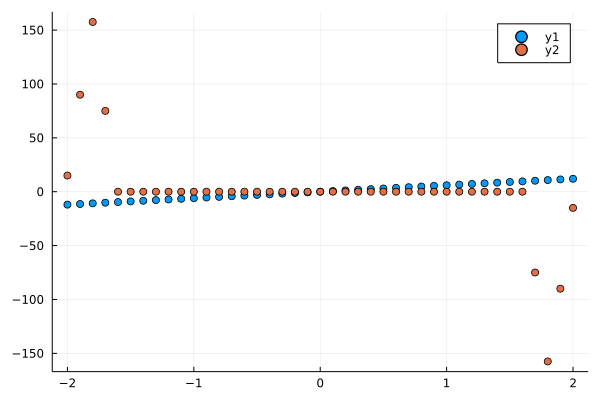

In [18]:
x = [k for k = -2:0.1:2]
y = [k^3 for k in x]
dy = [3k^2 for k in x]
ddy = [6k for k in x]
res = discrete_derivative(y, x, 4)
scatter(x, ddy)
scatter!(x, res)

In [17]:
[k^3 for k in x]

LoadError: MethodError: no method matching ^(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at strings/basic.jl:718
[0m  ^([91m::LinearAlgebra.Symmetric{var"#s814", S} where {var"#s814"<:Real, S<:(AbstractMatrix{var"#s814"} where var"#s814"<:var"#s814")}[39m, ::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:868
[0m  ^([91m::LinearAlgebra.Symmetric{var"#s814", S} where {var"#s814"<:Complex, S<:(AbstractMatrix{var"#s814"} where var"#s814"<:var"#s814")}[39m, ::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:869
[0m  ...

In [ ]:
[12, 3, 0, 3, 12]

## ?. Integral Numérica

In [7]:
function numerical_integration(f::Function, a::Number, b::Number, n::Int64 = 1000)::Float64
    # Calcula distancia entre cada ponto
    h = (b-a)/n
    
    # Calcula a soma usando a formula extendida das areas
    S = 0
    xi = a
    # O meio sera somado duas vezes, as pontas uma
    for i = 1:n
        S += f(xi)
        xi += h
        S += f(xi)
    end
    S *= h/2
    
    return S
end

function numerical_integration(f::Function, a::Number, b::Number, error::Number, M::Number)::Float64
    n = Int64(ceil(sqrt((M * (b-a)^3) / (12 * error))))
    return numerical_integration(f, a, b, n)
end

numerical_integration (generic function with 3 methods)

In [146]:
f(x) = x^2
continuous_derivative(f, 2, 1e-2, :front)

4.009999999999891

In [146]:
f(x) = x^2
a = 0
b = 2
error = 1e-7
M = 2
@assert(abs(numerical_integration(f, a, b, error, M) - 8/3) < error)
numerical_integration(f, a, b, error, M)

4.009999999999891

In [9]:
f(x) = x^2
a = 0
b = 2
n = 1024
numerical_integration(f, a, b, n)

2.666667938232422

In [10]:
function numerical_integration(f::Function, g::Function, h::Function, a::Number, b::Number, n::Int64)::Float64
    # Calcula a integral para um y especifico
    function outer_integral(y)
        return numerical_integration(x -> f(x,y), h(y), g(y), n)
    end
    
    # Calcula a integral para cada y
    return numerical_integration(outer_integral, a, b)
end

numerical_integration (generic function with 4 methods)

In [13]:
# Area do circulo
f(x,y) = y
h(x) = 0
g(x) = 2π
a = 0
b = 1
n = 1024
numerical_integration(f, g, h, a, b, n)

3.1415926535897962

In [17]:
# Integral nao calculavel por metodos tradicionais
f(x,y) = ℯ^(x^2)
h(y) = y^2
g(y) = y
a = 0
b = 1
n = 1024
numerical_integration(f, g, h, a, b, n)

0.21159889998140757

## ?. Resolver PVC

In [23]:
function generic_bvp_matrix(n::Int64, b::Number, c::Number, h::Number)::Matrix{Number}
    A = zeros(n,n)
    A[1, 1] = (-2 - 2 * b * h^2)
    A[1, 2] = (1 - c * h)
    
    A[n, n-1] = (1 + c * h)
    A[n, n] = (-2 - 2 * b * h^2)
    
    for i = 2:n-1
        A[i, i-1] = (1 + c * h)
        A[i, i] = (-2 - 2 * b * h^2)
        A[i, i+1] = (1 - c * h)
    end
    
    return A
end

function generic_bvp(xi, xf, yi, yf, n, coeff)
    # Calcula o tamanho do intervalo
    h = (xf - xi)/(n-1)
    
    A = generic_bvp_matrix(n-2, coeff[2], coeff[3], h) 
    b = zeros(n-2)
    
    # Cada equação vai possuir esse termo
    for i = 1:n-2
        b[i] = 2 * coeff[1] * h^2
    end
    
    # Com excecao do inicio e final, que possuem os limites ja conhecidos
    b[1] -= yi * (1 + coeff[3] * h)
    b[n-2] -= yf * (1 - coeff[3]) * h
    
    # Resolve e retorna
    y = A \ b
    return y
end
;

In [ ]:
generic_bvp

In [20]:
generic_bvp_matrix(5, 1, 2, 3)

5×5 Matrix{Float64}:
 -20.0   -5.0    0.0    0.0    0.0
   7.0  -20.0   -5.0    0.0    0.0
   0.0    7.0  -20.0   -5.0    0.0
   0.0    0.0    7.0  -20.0   -5.0
   0.0    0.0    0.0    7.0  -20.0